In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import xtrack as xt

## Import MAD-X sequence to Xsuite

In [3]:
# Read MAD-X sequence from file (using cpymad)
from cpymad.madx import Madx
mad = Madx()
mad.option(echo=False)
mad.call('../../LATTICE/Prova3.seq')
mad.beam()
mad.use('CNAO3S0')


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.03  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2024.04.25               +
  + Execution date: 2025.11.28 16:07:48      +
  ++++++++++++++++++++++++++++++++++++++++++++
assign, echo=output.out;





TITLE, "CNAO SYNC";







S0_001A_MBS: SBEND, L= 1.6772, 

E1 := 0.19634954085, E2 := 0.19634954085, ANGLE = 0.3926990817, 

K0 := 0.3926990817/1.6772, K1 := 0, K2 := 0, 

HGAP = 0.036, FINT:=FINTVAL;

S0_001B_TSP: MARKER;

S0_002A_DRI: DRIFT, L= 0.2101525103;

S0_003A_FLS: MARKER;

S0_004A_DRI: DRIFT, L= 0.109;

S0_005A_QUS: QUADRUPOLE, L= 0.36, 

K1 := KF;



S0_006A_BS1: MARKER;

S0_007A_DRI: DRIFT, L= 0.101;

S0_008A_FLS: MARKER;

S0_009A_PUH: HMONITOR, L= 0.3;

S0_010A_FLS: MARKER;

S0_011A_DRI: DRIFT, L= 0.061;

S0_012A_SSM: MARKER;

S0_013A_DRI: DRIFT, L= 0.056;

S0_014A_DIA: MARKER;

S0_015A_DRI: DRIFT, L= 0.033;

S0_016A_MSP: DRIFT, L= 0.65;

S0_017A_DRI: DRIFT, L= 0.9

In [4]:
# Import in Xsuite
line = xt.Line.from_madx_sequence(mad.sequence.CNAO3S0,
                                  deferred_expressions=True)

Converting sequence "cnao3s0":   0%|          | 0/392 [00:00<?, ?it/s]

In [5]:
# Choose bend model appropriate for small rings
line.configure_bend_model(edge='full', core='adaptive', num_multipole_kicks=15)

## Define reference particle

In [6]:
line.particle_ref = xt.Particles(q0=1, mass0=xt.PROTON_MASS_EV,
                                 kinetic_energy0=200e8) # eV

In [7]:
df = line.to_pandas()
df

,s,element_type,name,isthick,isreplica,parent_name,iscollective,element,s_start,s_center,s_end
0,0.00000,Marker,cnao3s0$start,False,False,None,False,Marker(),0.00000,0.00000,0.00000
1,0.00000,Drift,se_010a_esp,True,False,None,False,Drift(length=0.8),0.00000,0.40000,0.80000
2,0.80000,Drift,se_011a_dri,True,False,None,False,Drift(length=0.155),0.80000,0.87750,0.95500
3,0.95500,Marker,se_012a_fls,False,False,None,False,Marker(),0.95500,0.95500,0.95500
4,0.95500,Drift,se_013a_puh,True,False,None,False,Drift(length=0.3),0.95500,1.10500,1.25500
...,...,...,...,...,...,...,...,...,...,...,...
424,77.40308,Drift,se_007a_dri,True,False,None,False,Drift(length=0.145),77.40308,77.47558,77.54808
425,77.54808,Marker,se_008a_fls,False,False,None,False,Marker(),77.54808,77.54808,77.54808
426,77.54808,Drift,se_009a_dri,True,False,None,False,Drift(length=0.1),77.54808,77.59808,77.64808
427,77.64808,Marker,cnao3s0$end,False,False,None,False,Marker(),77.64808,77.64808,77.64808


In [8]:
# Select row by element name
df[df['name'] == 'se_007a_dri']

,s,element_type,name,isthick,isreplica,parent_name,iscollective,element,s_start,s_center,s_end
424,77.40308,Drift,se_007a_dri,True,False,None,False,Drift(length=0.145),77.40308,77.47558,77.54808


## Inspect machine layout

In [9]:
# Compute survey
sv = line.survey()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


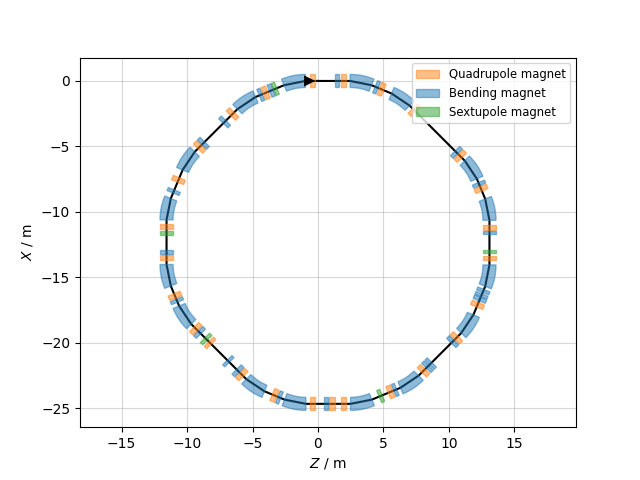

In [10]:
# Plot ring geometry using Xplt (credits P. Niedermayer)
import xplt
xplt.FloorPlot(sv, line)
plt.legend(fontsize='small', loc='upper right')

### Table with machine elements

In [11]:
# To extract a table with all elements in the lattice
tt = line.get_table()

In [12]:
# Inspect first ten elements
tt.rows[:100].show()

name                             s element_type isthick isreplica parent_name iscollective ...
cnao3s0$start                    0 Marker         False     False None               False
se_010a_esp                      0 Drift           True     False None               False
se_011a_dri                    0.8 Drift           True     False None               False
se_012a_fls                  0.955 Marker         False     False None               False
se_013a_puh                  0.955 Drift           True     False None               False
se_014a_fls                  1.255 Marker         False     False None               False
se_015a_dri                  1.255 Drift           True     False None               False
drift_se_016a_csh..1         1.334 Drift           True     False None               False
se_016a_csh                   1.48 Multipole      False     False None               False
drift_se_016a_csh..2          1.48 Drift           True     False None               F

In [13]:
# Inspect all quadrupoles
ttquad = tt.rows[tt.element_type=='Quadrupole']
ttquad.show()


print(ttquad.cols)
len(ttquad)

name                    s element_type isthick isreplica parent_name iscollective       s_start ...
se_018a_qus         1.745 Quadrupole      True     False None               False         1.745
sf_007a_qus       4.78051 Quadrupole      True     False None               False       4.78051
s0_005a_qus       7.78601 Quadrupole      True     False None               False       7.78601
s0_031a_qus        12.736 Quadrupole      True     False None               False        12.736
s1_007a_qus       15.7415 Quadrupole      True     False None               False       15.7415
s2_005a_qus        18.777 Quadrupole      True     False None               False        18.777
s2_021a_qus        21.127 Quadrupole      True     False None               False        21.127
s3_016a_qus       24.8625 Quadrupole      True     False None               False       24.8625
s4_005a_qus        27.898 Quadrupole      True     False None               False        27.898
s4_024a_qus        31.448 Quadrupole

26

In [14]:
ttsext = tt.rows[tt.element_type=='Sextupole']
ttsext.show()

name                    s element_type isthick isreplica parent_name iscollective       s_start ...
s2_019a_sxc        20.702 Sextupole       True     False None               False        20.702
s5_012a_sxc       35.3385 Sextupole       True     False None               False       35.3385
s8_028a_sxr       50.4991 Sextupole       True     False None               False       50.4991
sa_018a_sxc       59.5261 Sextupole       True     False None               False       59.5261
sd_014a_sxc       74.1626 Sextupole       True     False None               False       74.1626


In [15]:
ttbend = tt.rows[tt.element_type=='Bend']
ttbend.show()

name                    s element_type isthick isreplica parent_name iscollective       s_start ...
sf_001a_mbs       2.45415 Bend            True     False None               False       2.45415
s0_001a_mbs       5.78966 Bend            True     False None               False       5.78966
s1_001a_mbs       13.4152 Bend            True     False None               False       13.4152
s2_001a_mbs       16.7507 Bend            True     False None               False       16.7507
s3_001a_mbs       21.8362 Bend            True     False None               False       21.8362
s3_010a_bds       24.1445 Bend            True     False None               False       24.1445
s3_012a_bdi       24.4195 Bend            True     False None               False       24.4195
s4_001a_mbs       25.8717 Bend            True     False None               False       25.8717
s4_020a_qkh        30.729 Bend            True     False None               False        30.729
s4_022a_qkv        31.075 Bend      

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


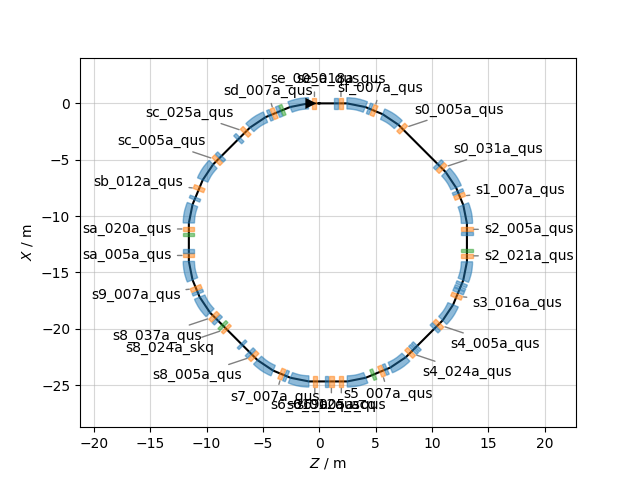

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


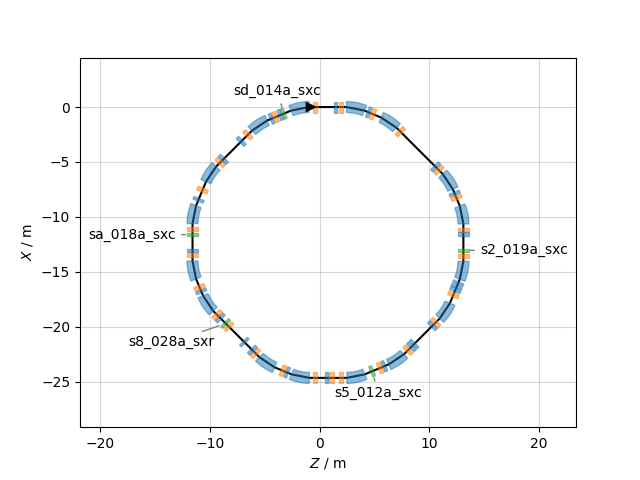

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


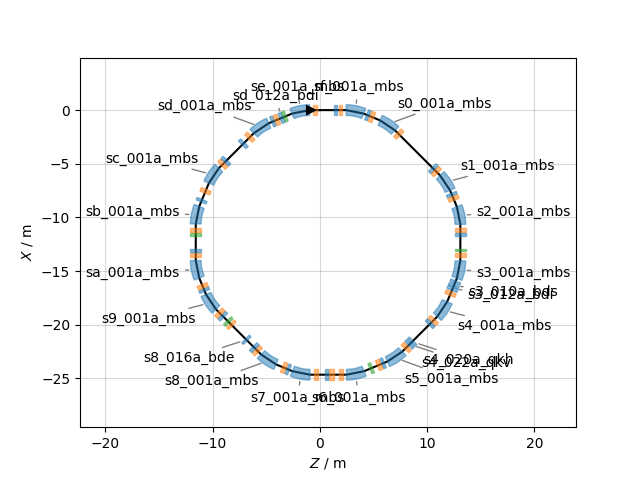

In [16]:
# Label all quadrupoles in survey plot to identify three quadrupole families
# (qfa, qfb, qd)
xplt.FloorPlot(sv, line, labels=ttquad.name)
xplt.FloorPlot(sv, line, labels=ttsext.name)
xplt.FloorPlot(sv, line, labels=ttbend.name)

### Inspect one element

In [17]:
line['se_005a_qus']

View of Quadrupole(k1=0.497, k1s=0, length=0.36, num_multipole_kicks=np.int64(15), _order=np.int64(5), inv_factorial_order=0.00833, knl=array([0., 0., 0., 0., 0., 0.]), ksl=array([0., 0., 0., 0., 0., 0.]), edge_entry_active=np.uint64(0), edge_exit_active=np.uint64(0), _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0)

### Inspect knobs controlling an element

In [18]:
line.element_refs['s3_016a_qus'].k1._expr

(1.0 * (-vars['kd']))

### Get all elements controlled by one knob

In [19]:
line.vars['kd']._info(limit=None)

#  vars['kd']._get_value()
   vars['kd'] = 0.4954568844

#  vars['kd']._expr is None

#  vars['kd']._find_dependant_targets()
   element_refs['sd_007a_qus'].k1
   element_refs['sb_012a_qus'].k1
   element_refs['s9_007a_qus'].k1
   element_refs['s7_007a_qus'].k1
   element_refs['s5_007a_qus'].k1
   element_refs['s3_016a_qus'].k1
   element_refs['s1_007a_qus'].k1
   element_refs['sf_007a_qus'].k1



# Match the optics

First twiss:

In [20]:
tw0 = line.twiss(method='4d')

# Tunes
tw0.qx, tw0.qy

(np.float64(1.6660031331255007), np.float64(1.7399968690346541))

In [21]:
# Phase advance in every element
tw0.mux

array([0.        , 0.        , 0.00786209, 0.00941994, 0.00941994,
       0.01246566, 0.01246566, 0.01327426, 0.01477566, 0.01477566,
       0.01628601, 0.01752356, 0.02135031, 0.02135031, 0.02290277,
       0.02290277, 0.02535611, 0.02535611, 0.04996906, 0.04996906,
       0.05403461, 0.05403461, 0.05579181, 0.05841729, 0.05841729,
       0.06114165, 0.06337685, 0.07180221, 0.07180221, 0.07506761,
       0.07506761, 0.08199093, 0.08199093, 0.08673133, 0.08673133,
       0.1200259 , 0.12381808, 0.12381808, 0.12574071, 0.13195446,
       0.13195446, 0.13369974, 0.13369974, 0.13894011, 0.13894011,
       0.14001538, 0.14001538, 0.14100524, 0.14100524, 0.14158975,
       0.1532615 , 0.17040545, 0.17333867, 0.17333867, 0.1751098 ,
       0.18475806, 0.18475806, 0.18714149, 0.19804582, 0.20029182,
       0.20029182, 0.2056367 , 0.2056367 , 0.20835276, 0.21090875,
       0.21090875, 0.21344514, 0.21472289, 0.22093663, 0.22093663,
       0.22285926, 0.22285926, 0.22665145, 0.22665145, 0.25994

In [22]:
#Chromaticities
tw0.dqx, tw0.dqy

(np.float64(-2.263502821735486), np.float64(-1.0830891870128312))

Text(0.5, 0, 's [m]')

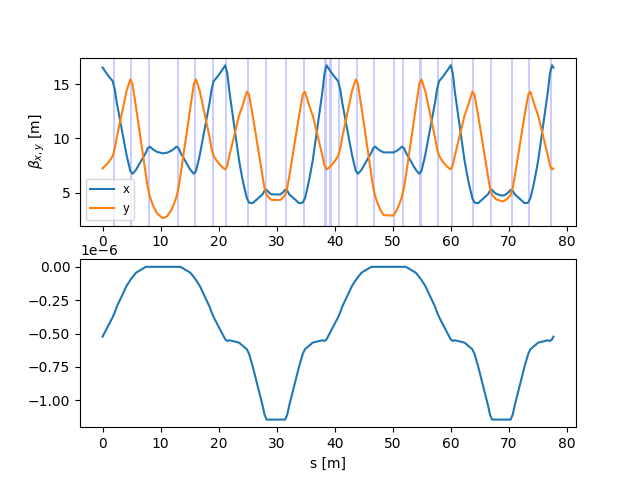

In [23]:
# Optics functions
plt.figure()
ax1 = plt.subplot(2, 1, 1)
plt.plot(tw0.s, tw0.betx, '-', label='x')
plt.plot(tw0.s, tw0.bety, '-', label='y')
plt.ylabel(r'$\beta_{x,y}$ [m]')
plt.legend(fontsize='small')

for n in ttquad.name:
    plt.axvspan(ttquad['s', n], ttquad['s', n] + line[n].length, color='b', alpha=0.2, linewidth=0)
    

plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(tw0.s, tw0.x, '-', label='x')
# plt.ylabel(r'$D_x$ [m]')
plt.xlabel('s [m]')
# plt.ylim(bottom=0, top=10)

## Control the tunes

In [24]:
opt = line.match(
    solve=False, # <- prepare the match without running it
    method='4d',
    vary=[
        xt.Vary('kf', limits=(0, 1),  step=1e-3),
        xt.Vary('kd', limits=(0, 1), step=1e-3),
        xt.Vary('kr', limits=(0, 1), step=1e-3)        
    ],
    targets=[
        xt.TargetSet(qx=1.664, tol=1e-6, tag='tunes'),
    ]
)

In [25]:
# Inspect situation before the match
opt.target_status()
opt.vary_status()

Target status:                          
id state tag   tol_met       residue   current_val    target_val description                          
0  ON    tunes   False    0.00200313         1.666         1.664 'qx', val=1.664, tol=1e-06, weight=10
Vary status:                 
id state tag met name lower_limit   current_val upper_limit val_at_iter_0          step        weight
0  ON        OK  kf             0      0.291214           1      0.291214         0.001             1
1  ON        OK  kd             0      0.495457           1      0.495457         0.001             1
2  ON        OK  kr             0      0.497095           1      0.497095         0.001             1


In [26]:
# Perform ten optimization steps
opt.step(10)

                                             
Optimize - start penalty: 0.02003       
Matching: model call n. 12               
Optimize - end penalty:  4.98211e-09


In [27]:
# Inspect optimization log
opt.log()

Table: 4 rows, 14 cols
iteration                   penalty alpha tag tol_met target_active hit_limits vary_active ...
0                         0.0200313    -1     n       y             nnn        yyy        
1                         0.0200313    -1     n       y             nnn        yyy        
2                       1.38121e-05     0     n       y             nnn        yyy        
3                       4.98211e-09     0     y       y             nnn        yyy        

In [28]:
# Inspect situation after the match
opt.target_status()
opt.vary_status()

Target status:                           
id state tag   tol_met       residue   current_val    target_val description                          
0  ON    tunes    True   4.98211e-10         1.664         1.664 'qx', val=1.664, tol=1e-06, weight=10
Vary status:                 
id state tag met name lower_limit   current_val upper_limit val_at_iter_0          step        weight
0  ON        OK  kf             0      0.290857           1      0.291214         0.001             1
1  ON        OK  kd             0       0.49562           1      0.495457         0.001             1
2  ON        OK  kr             0      0.496773           1      0.497095         0.001             1


Text(0.5, 0, 's [m]')

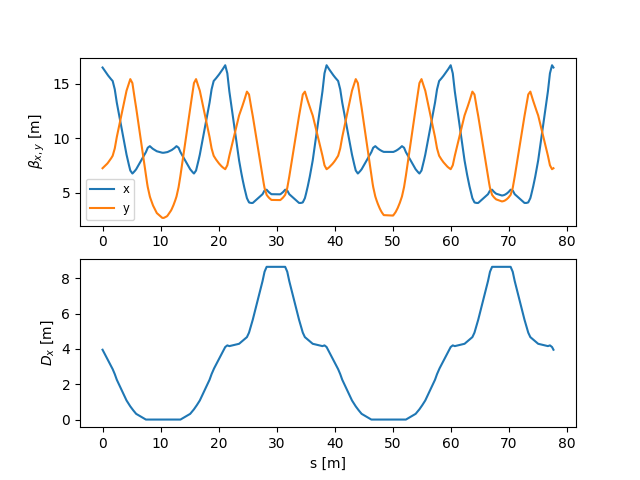

In [29]:
# Twiss again

tw = line.twiss(method='4d')

plt.figure()
ax1 = plt.subplot(2, 1, 1)
plt.plot(tw.s, tw.betx, '-', label='x')
plt.plot(tw.s, tw.bety, '-', label='y')
plt.ylabel(r'$\beta_{x,y}$ [m]')
plt.legend(fontsize='small')

plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(tw.s, tw.dx, '-', label='x')
plt.ylabel(r'$D_x$ [m]')
plt.xlabel('s [m]')


### Impose zero dispersion at electrostatic septum

In [30]:
opt = line.match(
    solve=False,
    method='4d',
    vary=[
        xt.Vary('kf', limits=(0, 1),  step=1e-3),
        xt.Vary('kd', limits=(0, 1), step=1e-3),
        xt.Vary('kr', limits=(0, 1), step=1e-3)     
    ],
    targets=[
        xt.TargetSet(qx=1.664, tol=1e-6),
        xt.Target(dx = 0, at='symp', tol=1e-6)
    ]
)

In [31]:
opt.target_status()
opt.vary_status()

Target status:                          
id state tag     tol_met       residue   current_val    target_val description                                 
0  ON    qx         True   4.98211e-10         1.664         1.664 'qx', val=1.664, tol=1e-06, weight=10       
1  ON    symp_dx   False     0.0140972     0.0140972             0 ('dx', 'symp'), val=0, tol=1e-06, weight ...
Vary status:                 
id state tag met name lower_limit   current_val upper_limit val_at_iter_0          step        weight
0  ON        OK  kf             0      0.290857           1      0.290857         0.001             1
1  ON        OK  kd             0       0.49562           1       0.49562         0.001             1
2  ON        OK  kr             0      0.496773           1      0.496773         0.001             1


In [32]:
opt.step(20)

                                             
Optimize - start penalty: 0.141         
Matching: model call n. 12               
Optimize - end penalty:  9.07437e-08


In [33]:
opt.target_status()
opt.vary_status()

Target status:                           
id state tag     tol_met       residue   current_val    target_val description                                 
0  ON    qx         True  -7.49826e-10         1.664         1.664 'qx', val=1.664, tol=1e-06, weight=10       
1  ON    symp_dx    True   9.04334e-09   9.04334e-09             0 ('dx', 'symp'), val=0, tol=1e-06, weight ...
Vary status:                 
id state tag met name lower_limit   current_val upper_limit val_at_iter_0          step        weight
0  ON        OK  kf             0      0.290559           1      0.290857         0.001             1
1  ON        OK  kd             0      0.495619           1       0.49562         0.001             1
2  ON        OK  kr             0      0.497103           1      0.496773         0.001             1


Text(0.5, 0, 's [m]')

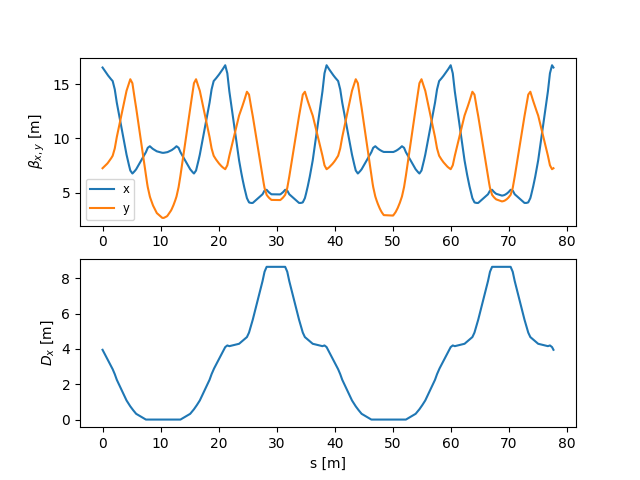

In [34]:
# Twiss again
tw = line.twiss(method='4d')

plt.figure()
ax1 = plt.subplot(2, 1, 1)
plt.plot(tw.s, tw.betx, '-', label='x')
plt.plot(tw.s, tw.bety, '-', label='y')
plt.ylabel(r'$\beta_{x,y}$ [m]')
plt.legend(fontsize='small')

plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(tw.s, tw.dx, '-', label='x')
plt.ylabel(r'$D_x$ [m]')
plt.xlabel('s [m]')

## Correct chromaticity

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


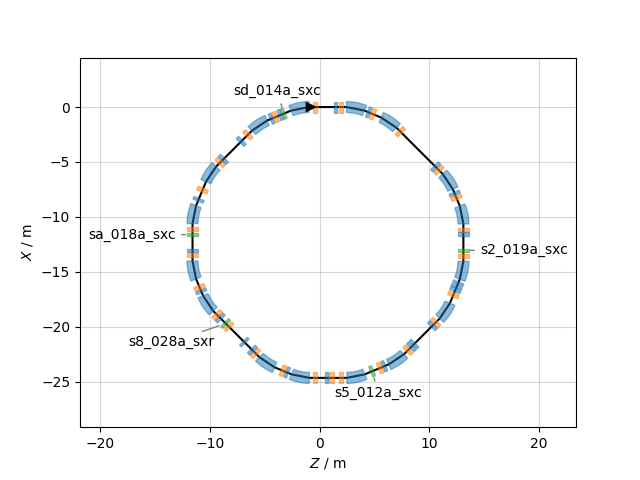

In [35]:
# Label all sextupoles (sf, sd and se)
ttsext = tt.rows[tt.element_type=='Sextupole']
xplt.FloorPlot(sv, line, labels=ttsext.name)

In [36]:
# We build a single match with all constraints
# (can be reused to retune the machine)
opt = line.match(
    solve=False,
    method='4d',
    vary=[
        xt.VaryList(['s0', 's1', 'sr'], step=1e-3, tag = 'sext'),
        xt.VaryList(['kf', 'kd','kr'], limits=(0, 1),  step=1e-3, tag='quad')
    ],
    targets=[
        xt.TargetSet(dqx=-1, dqy=-1, tol=1e-3, tag="chrom"),
        xt.Target(dx = 0, at='symp', tol=1e-6),
        xt.TargetSet(qx=1.664, tol=1e-6),
    ]
)
opt.step(20)

                                             
Optimize - start penalty: 1.268         
Matching: model call n. 34               
Optimize - end penalty:  1.38937e-07


In [37]:
opt.target_status()

Target status:                           
id state tag     tol_met       residue   current_val    target_val description                                 
0  ON    chrom      True  -1.22597e-07            -1            -1 'dqx', val=-1, tol=0.001, weight=1          
1  ON    chrom      True  -7.10088e-09            -1            -1 'dqy', val=-1, tol=0.001, weight=1          
2  ON    symp_dx    True  -6.47187e-09  -6.47187e-09             0 ('dx', 'symp'), val=0, tol=1e-06, weight ...
3  ON    qx         True   5.87259e-10         1.664         1.664 'qx', val=1.664, tol=1e-06, weight=10       


In [38]:
opt.vary_status()

Vary status:                 
id state tag  met name lower_limit   current_val upper_limit val_at_iter_0          step        weight
0  ON    sext OK  s0   None           -0.0449284 None            -0.623407         0.001             1
1  ON    sext OK  s1   None            -0.232205 None           0.00340063         0.001             1
2  ON    sext OK  sr   None             -3.30185 None                 -3.3         0.001             1
3  ON    quad OK  kf   0                0.261763 1                0.290559         0.001             1
4  ON    quad OK  kd   0                0.385894 1                0.495619         0.001             1
5  ON    quad OK  kr   0                0.470494 1                0.497103         0.001             1


### Insert septum aperture

In [39]:
line.discard_tracker()
line.insert_element(name='septum_aperture',
                    element=xt.LimitRect(max_x=0.1),
                    at='se_010a_esp')

### Save machine state

In [40]:
line.to_json('cnao_lattice_00_optics.json')